<a href="https://colab.research.google.com/github/Alina1-10/NM/blob/main/%D0%9B%D0%B0%D0%B1_%D1%80_5%2C_%D0%B2%D0%B0%D1%80%D0%B2%D0%B0%D0%BD%D1%82_7%2C_%D0%93%D1%83%D0%B1%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B0_%D0%90%D0%BB%D1%96%D0%BD%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 5 Губницька 7 варіант
Розв'язання систем рівнянь.

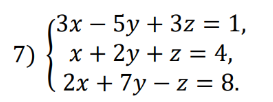

In [23]:
import numpy as np

In [24]:
a = np.array([
  [3, -5, 3],
  [1, 2, 1],
  [2, 7, -1],
])

b = np.array([[1],[4],[8]])

In [25]:
# Напиши функцію для вирішення системи методом Гауса
def solve_gausse(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose: print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - розв'язків немає")
        return None
    # Reading number of unknowns
    n = len(b)
    m = np.concatenate([a, b], axis=1, dtype=float)

    # Applying Gauss-Jordan Elimination
    for i in range(n):

        # Swap rows to avoid division by 0
        if m[i, i] == 0:
            for k in range(i+1, n):
                if m[k, k] != 0:
                    m[[i, k], :] = m[[k, i], :]
                    break


        if m[i, i] != 1:
            m[i, :] *= 1/m[i, i]

        for j in range(n):
            if i != j:
                ratio = m[j][i]/m[i][i]

                m[j, :] = m[j, :] - ratio * m[i, :]

    return m[:, [-1]]

print(f"Вектор рішення: \r\n {solve_gausse(a, b)}")

Вектор рішення: 
 [[1.]
 [1.]
 [1.]]


In [26]:
# Матриця А та вектор b
a = [[3,  0, 0,  7,  1],
     [9,  7, 9, -1,  4],
     [0,  2, 2,  0,  0],
     [5, -2, 5,  0,  6],
     [1,  9, 7,  8, -3]]
b = [7, -9, 6, 15, -7]

In [27]:

# Довжина списку
d = len(b)

# Прямий хід
for m in range(0,d-1):
    for j in range(m+1,d):
        k = a[j][m] / a[m][m]
        for i in range(m,d):
            a[j][i] = a[j][i] - k*a[m][i]
        b[j] = b[j] - k*b[m]

# Скалярний добуток
def scalar_product(a, b, n):
    s = 0
    for i in range(n+1, d):
        s = s + a[n][i]*b[i]
    return s

# Зворотний хід
for i in range(d-1, -1, -1):
    b[i] = (b[i] - scalar_product(a, b, i)) / a[i][i]

# Відображення результатів
print('Матриця А після перетворень прямого ходу')
for i in range(0,d):
    print(a[i])
print()
print("Вектор розв'язку x")
for i in range(0,d):
    print(b[i])

Матриця А після перетворень прямого ходу
[3, 0, 0, 7, 1]
[0.0, 7.0, 9.0, -22.0, 1.0]
[0.0, 0.0, -0.5714285714285712, 6.285714285714286, -0.2857142857142857]
[0.0, 0.0, 0.0, 65.33333333333337, 0.8333333333333317]
[0.0, 0.0, 8.881784197001252e-16, 0.0, -2.1249999999999982]

Вектор розв'язку x
-10.142857142857148
9.040816326530626
-6.040816326530626
2.6326530612244894
19.000000000000014


# **2 частина**

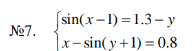

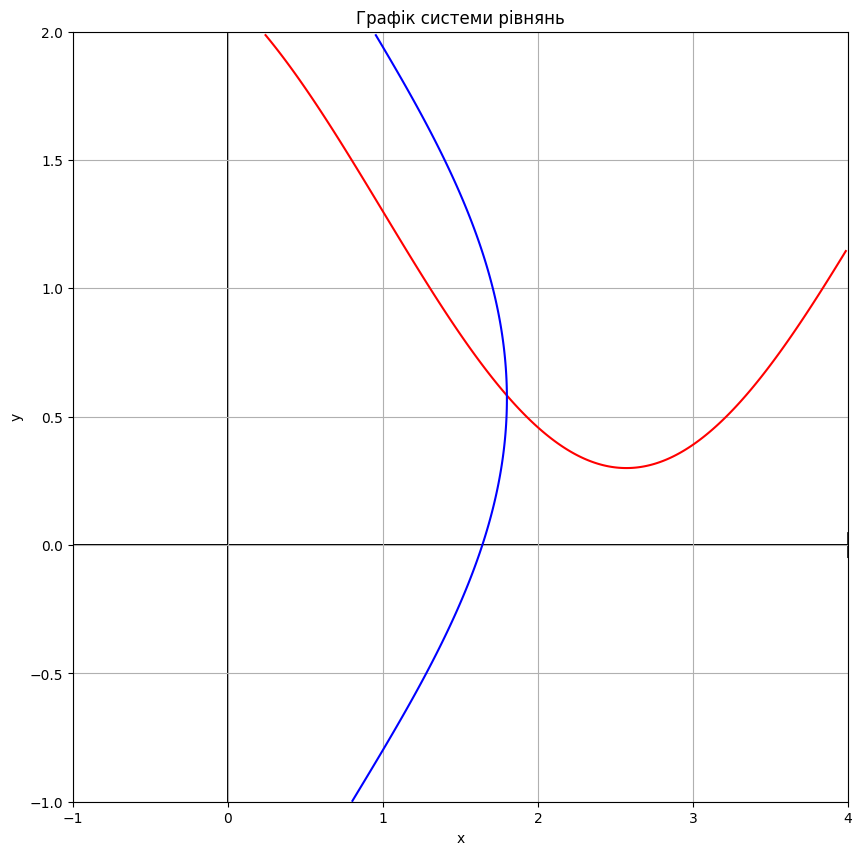

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Область значень для x та y
x_min, x_max = -1, 4
y_min, y_max = -1, 2
step = 0.01

# Створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Рівняння системи
eq1 = np.sin(x - 1) + y - 1.3
eq2 = x - np.sin(y + 1) - 0.8

# Створюємо графік
fig, ax = plt.subplots(figsize=(10, 10))

# Додаємо графік першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# Додаємо графік другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# Налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')

# Додаємо стрілки на кінцях осей
ax.arrow(x_min, 0, x_max - x_min, 0, head_width=0.1, head_length=0.05, fc='black', ec='black')
ax.arrow(0, y_min, 0, y_max - y_min, head_width=0.1, head_length=0.2, fc='black', ec='black')

# Додаємо сітку
plt.grid(True)

# Показуємо графік
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [39]:
#Розв'язок системи рівнянь методом простої ітерації
import numpy as np
from scipy import optimize

x0, y0 = 1.75, 0.75

def f1(x):
    return 1.3 - np.sin(x-1)  #задаємо функції
def f2 (y):
    return 0.8 + np.sin(y + 1) #задаємо функції
#Перевірка методу на збіжність

def iter (x,y,e):
    xn = x
    yn = y
    xn1 = f2(x)
    yn1 = f1(y)
    n = 1
    while ((abs(xn1-xn)>=e) & (abs(yn1-yn) >=e)):
        xn = xn1
        yn = yn1
        xn1 = f2(yn)
        yn1 = f1(xn)
        n += 1
    print ('Simple iteration:')
    print ('x=', xn, '\ny=',yn,'\nThe amount of iteration = ',n)

iter(x0,y0,0.0001)

def f3(x): #Задаємо функцію для перевірки
    return np.sin(x[0] - 1) + x[1] - 1.3, x[0] - np.sin(x[1] + 1) - 0.8


s = optimize.root(f3, [0.,0.], method = 'hybr') #Перевірка розв*язку #Відповіді
#мають співпасти
print ('Chek',s.x)

Simple iteration:
x= 1.7998555879661717 
y= 0.5840067057376541 
The amount of iteration =  8
Chek [1.79992923 0.58269321]


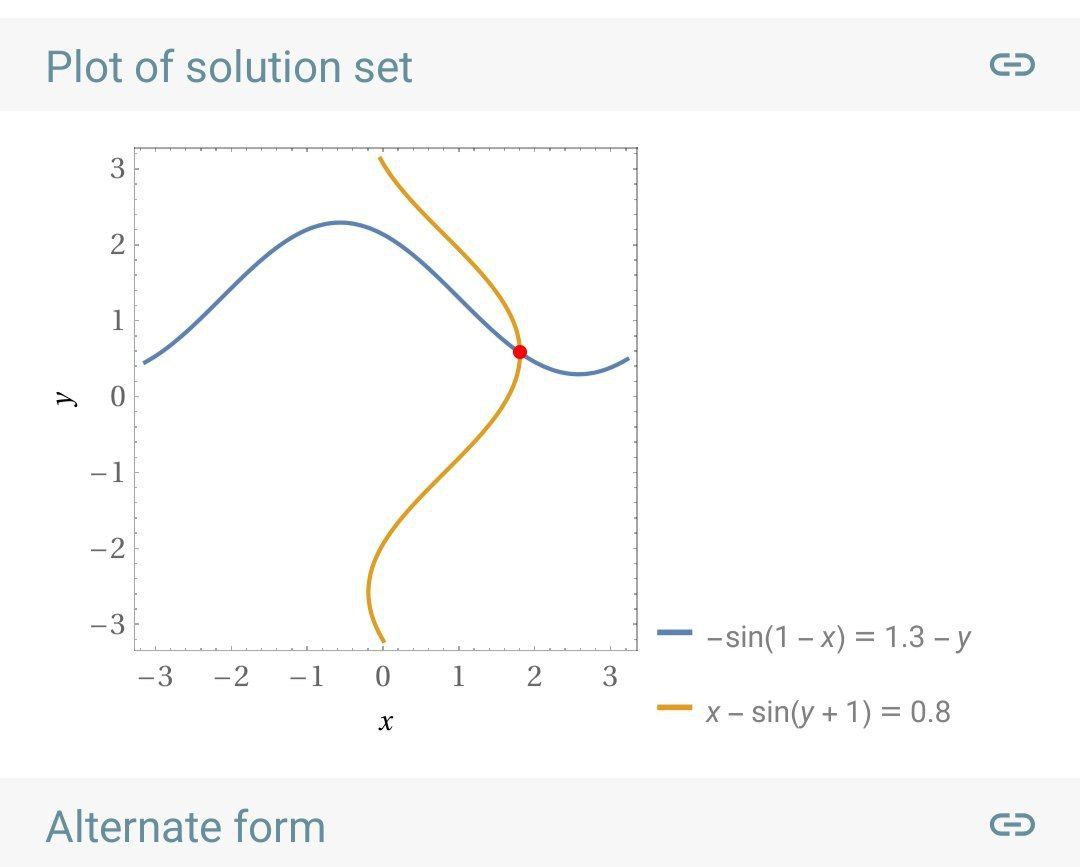

Зверніть увагу!
#Відповіді мають співпасти.

